# Furniture Sales Time Series Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#loading the data
df= pd.read_excel('Furniture-Sales.xls',sheet_name='Orders',index_col='Row ID')

In [3]:
df.shape

(9994, 20)

In [4]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [5]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
df.dtypes

Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

## Data Preprocessing

In [7]:
# Taking the order date and sales in our data as we only need that to predict future sales as per time series model.
data= df.drop(['Order ID','Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
        'Quantity', 'Discount', 'Profit'], axis=1)

In [8]:
data.head()

,Order Date,Sales
Row ID,,
1,2016-11-08,261.9600
2,2016-11-08,731.9400
3,2016-06-12,14.6200
4,2015-10-11,957.5775
5,2015-10-11,22.3680


In [9]:
# Now as we see in data we have more than one sales for a particular date
# so we will group the data by date and will do the sum of its sales
data = data.groupby('Order Date', sort=True)['Sales'].sum().reset_index()

In [10]:
data.set_index('Order Date', inplace=True)

In [11]:
# So if you want you can slice it now with day, date or year
data['2014-01']

,Sales
Order Date,
2014-01-03,16.448
2014-01-04,288.060
2014-01-05,19.536
2014-01-06,4407.100
2014-01-07,87.158
2014-01-09,40.544
2014-01-10,54.830
2014-01-11,9.940
2014-01-13,3553.795


Now as we know mainly sales are done with Monthly prediction so we will change the freq of daily to monthly with avg monthly sales and will take first of every month.

In [12]:
data = data.resample('MS').mean()

In [13]:
data['2017']

,Sales
Order Date,
2017-01-01,1911.798870
2017-02-01,1015.056670
2017-03-01,2102.584029
2017-04-01,1352.649485
2017-05-01,1639.300378
2017-06-01,2037.758681
2017-07-01,1560.841931
2017-08-01,2337.810667
2017-09-01,3138.094714


## Seasonality Check

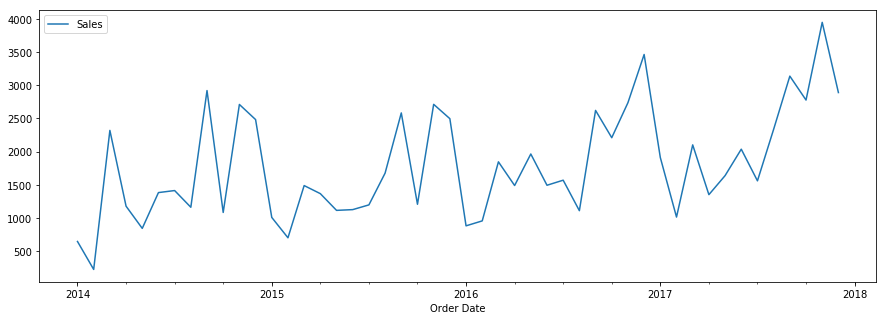

In [14]:
# Visulaizing the data
data.plot(figsize=(15,5))
plt.show()

Now if we will see in graph, Per year sales is less in starting month and max in end month with low sales in few mid month. Which represent the seasonality trend both

In [15]:
# We have seasonal decompose class whcih returns all the following plot data
from statsmodels.tsa.seasonal import seasonal_decompose

In [16]:
decom= seasonal_decompose(data, model= 'additive')

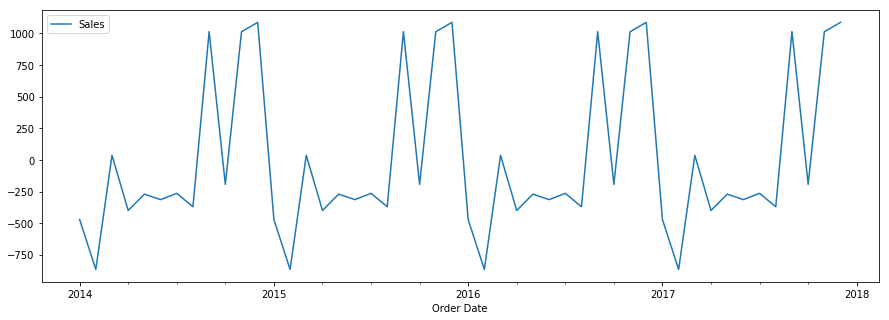

In [17]:
# Seasonal
decom.seasonal.plot(figsize= (15,5))

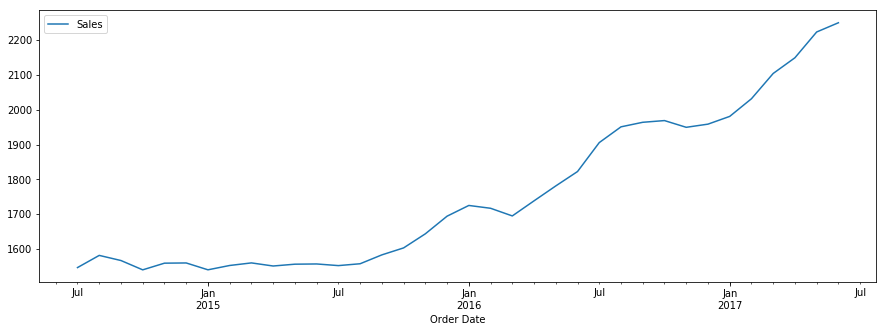

In [18]:
# Trend
decom.trend.plot(figsize= (15,5))

We can see we have very less increasing trend in our data, starting from july 2015

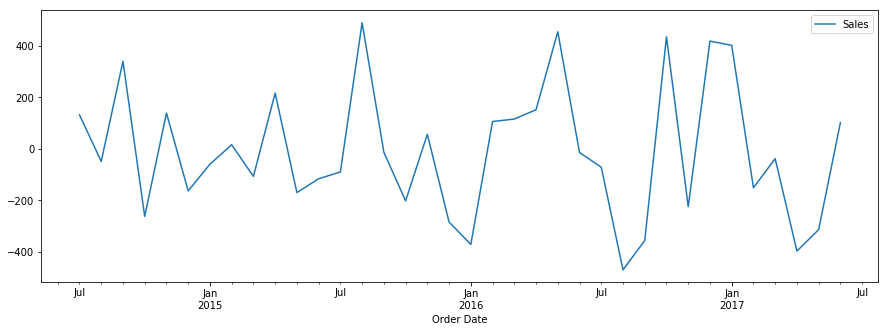

In [19]:
#Residuals
decom.resid.plot(figsize=(15,5))

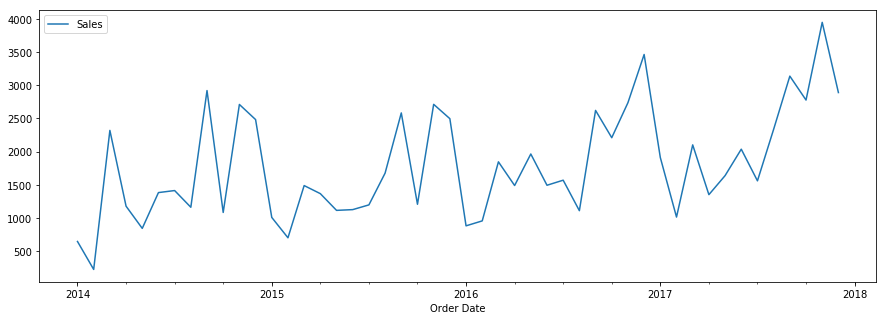

In [20]:
#original data plot
decom.observed.plot(figsize=(15,5))

In [21]:
# Now as we have Trend we will try to use lag to check trend.
diff= data.diff(periods=1)

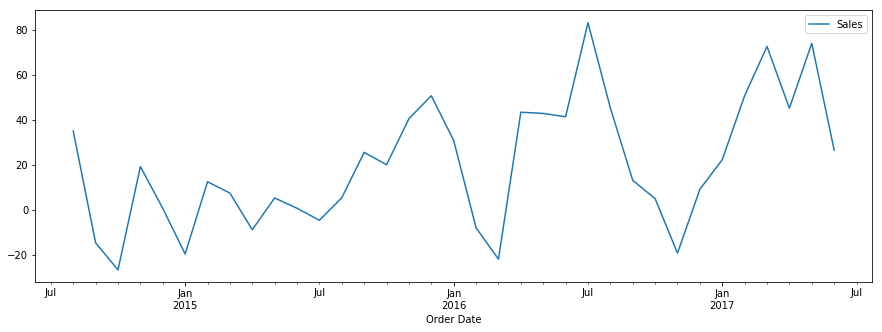

In [22]:
seasonal_decompose(diff.dropna(),model='additive').trend.plot(figsize=(15,5))

Now we can see with One lag , we can see increasing trend is gone, which we can use for model.

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

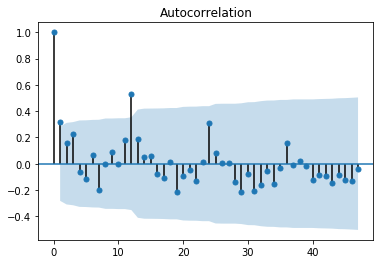

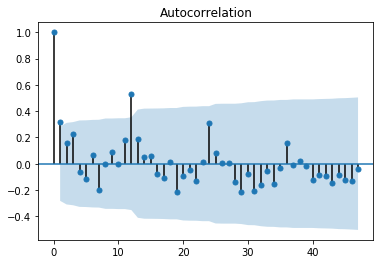

In [24]:
plot_acf(data)

Acf plot also suggest with no linear trend

In [25]:
# now getting training and testing data set 
train= data.iloc[0:36,:]
test= data.iloc[36:48,:]

In [26]:
print(train.shape, test.shape)

(36, 1) (12, 1)


In [27]:
import warnings
warnings.filterwarnings('ignore')
import itertools as it

In [28]:
p=d=q=range(0,2)
pdq= list(it.product(p,d,q))

In [29]:
seasonal_pdq=[(x[0], x[1], x[2], 12) for x in list(it.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [30]:
from statsmodels.tsa.api import SARIMAX
pair= {}
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(data,order=param,
                            seasonal_order=param_seasonal,
                            enforce_stationarity=False,
                            enforce_invertibility=False)
            results = mod.fit()
            pair[results.aic]=(param,param_seasonal)
#             print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [31]:
best_order,best_s_order= pair[min(pair.keys())]
print(best_order,best_s_order)

(1, 1, 1) (1, 1, 0, 12)


In [32]:
final_model= SARIMAX(data,order=best_order,seasonal_order=best_s_order).fit()

In [33]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(1, 1, 0, 12)   Log Likelihood                -264.578
Date:                            Thu, 25 Jul 2019   AIC                            537.155
Time:                                    20:34:40   BIC                            543.377
Sample:                                01-01-2014   HQIC                           539.303
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0519      0.311     -0.167      0.867      -0.661       0.557
ma.L1         -0.8675      0.179     -4.840      0.000      -1.219      -0.516
ar.S.L12      -0.5527      0.160     -3.450      0.001      -0.867      -0.239
sigma2      1.865e+05   5.34e+04      3.494      0.000    8.19e+04    2.91e+05
===================================================================================
Ljung-Box (Q):                       46.94   Jarque-Bera (JB):                 1.06
Prob(Q):                              0.07   Prob(JB):                         0.59
Heteroskedasticity (H):               2.15   Skew:                             0.30
Prob(H) (two-sided):                  0.20   Kurtosis:                         2.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

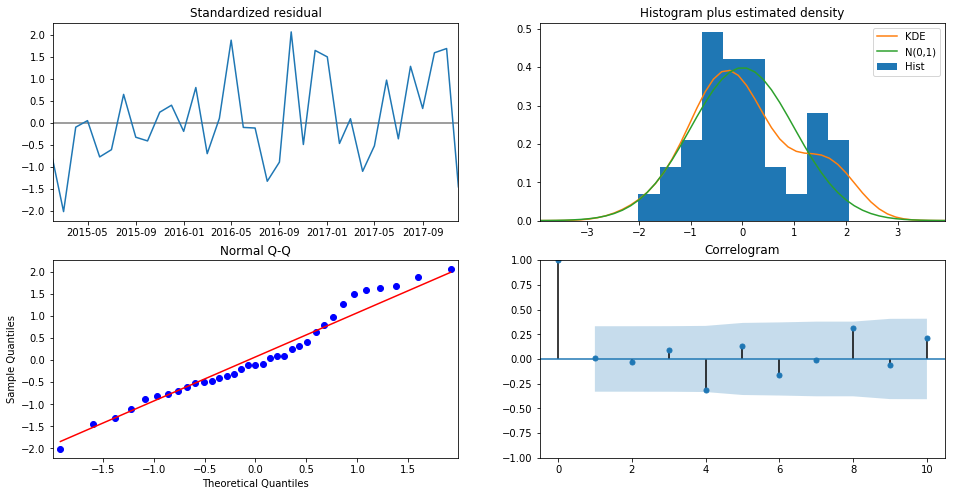

In [34]:
final_model.plot_diagnostics(figsize=(16, 8))
plt.show()

our model diagnostics suggests that the model residuals are near normally distributed.

In [35]:
yp= final_model.predict(start='2017-01-01', end='2017-12-01')

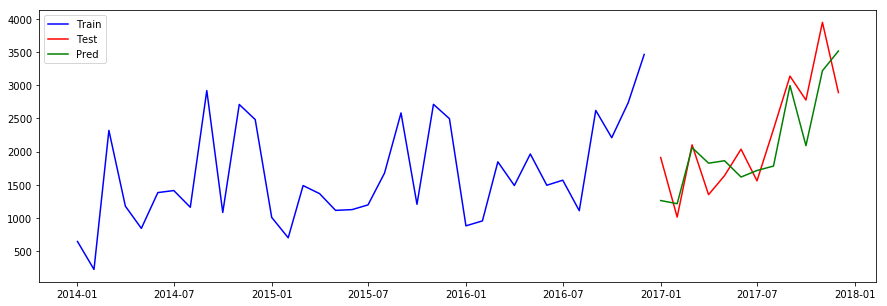

In [36]:
plt.figure(figsize=(15,5))
plt.plot(train,'blue',label='Train')
plt.plot(test,'red',label='Test')
plt.plot(yp,'green',label='Pred')
plt.legend(loc='best')
plt.show()

In [37]:
from sklearn.metrics import mean_squared_error, r2_score

print('rmse:{}'.format(np.sqrt(mean_squared_error(test,yp))))
print('R2 Score:{}'.format(r2_score(test,yp)))

rmse:470.7727902628533
R2 Score:0.6555900225765929


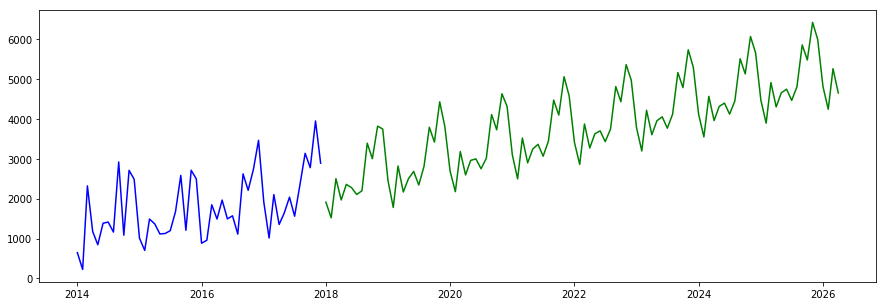

In [38]:
plt.figure(figsize=(15,5))
plt.plot(data,'blue',label='Train')
plt.plot(final_model.forecast(steps=100),'green')
plt.show()

So now with R2 of .65 and above we cn consider it as a good model. Which captured trend and seasonality both for future also.


In [46]:
from pmdarima.arima import auto_arima
final_model= auto_arima(data, start_p=0, start_q=0,d=1,
                           max_p=3,max_q=3, m=12,
                           start_P=0,D=1,start_Q=0 ,seasonal=True,
                           max_P=3,max_Q=3, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=562.382, BIC=565.492, Fit time=0.019 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=546.437, BIC=552.658, Fit time=0.266 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=552.827, BIC=557.493, Fit time=0.034 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 0, 12); AIC=547.360, BIC=555.136, Fit time=0.779 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=554.705, BIC=559.371, Fit time=0.140 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=542.763, BIC=550.540, Fit time=0.404 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=542.746, BIC=55

rmse:662.4781334247258
R2 Score:0.3179815659687161


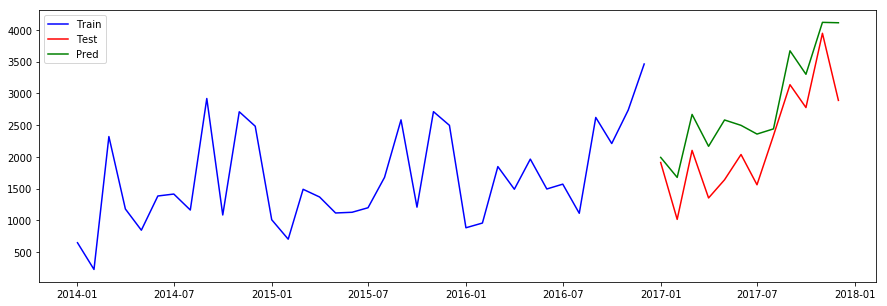

In [47]:
model= final_model.fit(data)
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index, columns=['Prediction'])
print('rmse:{}'.format(np.sqrt(mean_squared_error(test['Sales'],forecast['Prediction']))))
print('R2 Score:{}'.format(r2_score(test['Sales'],forecast['Prediction'])))
plt.figure(figsize=(15,5))
plt.plot(train['Sales'],'blue',label='Train')
plt.plot(test['Sales'],'red',label='Test')
plt.plot(forecast['Prediction'],'green',label='Pred')
plt.legend(loc='best')
plt.show()

Auto_Arima is not good at all as per R2 Score